In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv('drive/My Drive/DL_ICP3/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
pureSentences = sentences
y = df['label'].values

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


tokenizing data

In [0]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

getting the vocabulary of data


In [0]:
sentences = tokenizer.texts_to_matrix(sentences)

In [25]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [26]:
model = Sequential()
model.add(layers.Dense(300, activation='relu',input_dim=input_dim))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 4s 55us/step - loss: 0.8791 - acc: 0.5088 - val_loss: 0.8430 - val_acc: 0.5130
Epoch 2/5
75000/75000 [==============================] - 4s 55us/step - loss: 0.7921 - acc: 0.5774 - val_loss: 0.8431 - val_acc: 0.5128
Epoch 3/5
75000/75000 [==============================] - 4s 54us/step - loss: 0.6949 - acc: 0.6707 - val_loss: 0.8694 - val_acc: 0.5132
Epoch 4/5
75000/75000 [==============================] - 4s 56us/step - loss: 0.5138 - acc: 0.8032 - val_loss: 0.9481 - val_acc: 0.4996
Epoch 5/5
75000/75000 [==============================] - 4s 53us/step - loss: 0.3068 - acc: 0.9175 - val_loss: 1.0525 - val_acc: 0.5096


In [10]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)


176408
2470


In [0]:
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [13]:
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 221s 3ms/step - loss: 1.0895 - acc: 0.4918 - val_loss: 0.8617 - val_acc: 0.5004
Epoch 2/5
75000/75000 [==============================] - 217s 3ms/step - loss: 0.8371 - acc: 0.5182 - val_loss: 0.8442 - val_acc: 0.4985
Epoch 3/5
75000/75000 [==============================] - 216s 3ms/step - loss: 0.7919 - acc: 0.5592 - val_loss: 0.8408 - val_acc: 0.5036
Epoch 4/5
75000/75000 [==============================] - 222s 3ms/step - loss: 0.7223 - acc: 0.6326 - val_loss: 0.8711 - val_acc: 0.4940
Epoch 5/5
75000/75000 [==============================] - 217s 3ms/step - loss: 0.6119 - acc: 0.7137 - val_loss: 0.9537 - val_acc: 0.4928


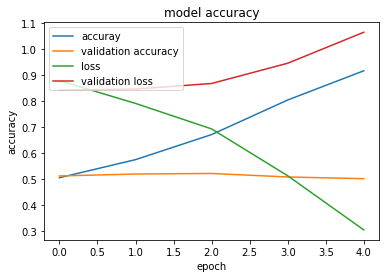

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','validation loss'], loc='upper left')
plt.show()

In [15]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)


In [0]:
sentences= twenty_train.data
y=twenty_train.target

In [0]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)


In [0]:
from keras.layers import Embedding, Flatten
n = Sequential()
n.add(Embedding(vocab_size, 50, input_length=max_review_len))
n.add(Flatten())
n.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
n.add(layers.Dense(20, activation='softmax'))
n.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [19]:
h2=n.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 116s 14ms/step - loss: 12.0250 - acc: 0.0535 - val_loss: 3.0907 - val_acc: 0.0438
Epoch 2/5
8485/8485 [==============================] - 115s 14ms/step - loss: 2.9982 - acc: 0.0662 - val_loss: 2.9894 - val_acc: 0.0495
Epoch 3/5
8485/8485 [==============================] - 113s 13ms/step - loss: 2.9537 - acc: 0.0664 - val_loss: 2.9662 - val_acc: 0.0728
Epoch 4/5
8485/8485 [==============================] - 113s 13ms/step - loss: 2.9219 - acc: 0.0788 - val_loss: 2.9437 - val_acc: 0.0873
Epoch 5/5
8485/8485 [==============================] - 113s 13ms/step - loss: 2.8595 - acc: 0.0949 - val_loss: 2.8889 - val_acc: 0.0820


In [0]:
x=model.predict_classes(X_test[[1],:])

In [28]:
print("Actual Prediction",y_test[1],"Predicted Prediction",x)

Actual Prediction 2 Predicted Prediction [2]


In [29]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/Colab Notebooks/logs/{}".format(time()))
model.fit(X_train,y_train,verbose=1,callbacks=[tensorboard], epochs=5)



Epoch 1/5
75000/75000 [==============================] - 14s 189us/step - loss: 0.4487 - acc: 0.8141

Epoch 2/5
75000/75000 [==============================] - 14s 193us/step - loss: 0.1802 - acc: 0.9460
Epoch 3/5
75000/75000 [==============================] - 14s 190us/step - loss: 0.1316 - acc: 0.9667
Epoch 4/5
75000/75000 [==============================] - 14s 187us/step - loss: 0.1104 - acc: 0.9738
Epoch 5/5
75000/75000 [==============================] - 15s 199us/step - loss: 0.0980 - acc: 0.9782


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
